<a href="https://colab.research.google.com/github/juanpi19/medium-articles/blob/main/standard-errors/standard_errors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Is there a  difference in the proportion of customers satisfied with our new product compared to our previous product?


We sampled two random samples:


n1 = 500,
p1 = 0.3

n2 = 600,
p2 = 0.25

In [106]:
n1 = 500
x1 = 150
p1 = 0.3

n2 = 600
x2 = 150
p2 = 0.25

point_estimate = p1 - p2

# Confidence Interval

In [99]:
# CI
se = np.sqrt((p1*(1-p1)/n1) + (p2*(1-p2)/n2))
z = 1.96

lower_ci = point_estimate - z * se
upper_ci = point_estimate + z * se
lower_ci, upper_ci

(-0.003046884922679495, 0.10304688492267947)

# Hypothesis Testing

In [107]:


p_hat = (x1 + x2) / (n1 + n2)
pooled_se = np.sqrt(p_hat*(1-p_hat) * (1/n1 + 1/n2))
pooled_se

# z-stat
point_estimate/pooled_se

1.8540496217739155

# P-value

In [2]:
(1 - .9678) * 2

0.06440000000000001

# Sampling Distribution

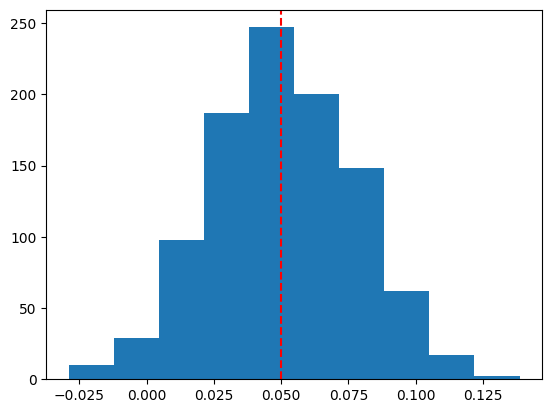

In [113]:
n1, n2 = 500, 600
p1, p2 = 0.3, 0.25

sampling_dist = []

for _ in range(1000): # simulating 1000 samples

  # Drawing the Number of Successes
  p1_bootstrap = np.random.binomial(n=n1, p=p1) / n1
  p2_bootstrap = np.random.binomial(n=n2, p=p2) / n2

  # Point Estimate
  estimate = p1_bootstrap - p2_bootstrap

  sampling_dist.append(estimate)

plt.hist(sampling_dist)
plt.axvline(p1-p2, ls='--', c='red');

In [115]:
np.std(sampling_dist)

0.026695040819098466

# Randomized Distribution

In [86]:
df = pd.DataFrame()
df1 = pd.DataFrame()

# 0 represents a customer is not satified, a 1 represents the customer is satisfied

df['sample'] = np.zeros(n1)
indices_to_replace = df['sample'].index.isin(np.random.choice(df.index, int(p1*n1), replace=False))
df.loc[indices_to_replace, 'sample'] = 1


df1['sample'] = np.zeros(n2)
indices_to_replace = df1['sample'].index.isin(np.random.choice(df1.index, int(p2*n2), replace=False))
df1.loc[indices_to_replace, 'sample'] = 1

df = pd.concat([df, df1])


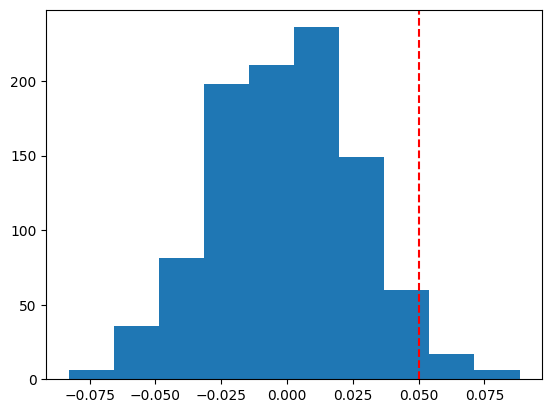

In [87]:
randomized_dist = []
for _ in range(1000):
  p1_randomized = sum(np.random.choice(df['sample'], size=n1)) / n1
  p2_randomized = sum(np.random.choice(df['sample'], size=n2)) / n2

  pe = p1_randomized - p2_randomized
  randomized_dist.append(pe)

plt.hist(randomized_dist)
plt.axvline(p1-p2, ls='--', c='red')

In [110]:
(sum(np.array(randomized_dist) >= (p1-p2)) / 1000) * 2

0.078